In [1]:
import cv2
import sys
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo, display, HTML, Image, Video

opencv_path = "opencv/samples/data/"
opencvxtra_path = "opencv_extra/testdata/dnn/"

In [4]:
# to identify centre line in the image and test it out in the image
road = cv2.imread('2702_2024-10-20_14-49-01.jpg')
i2 = cv2.line(road, (1149,1061), (390,264),(255, 0, 0), 3 )

Text(0.5, 1.0, 'Original Screen capture')

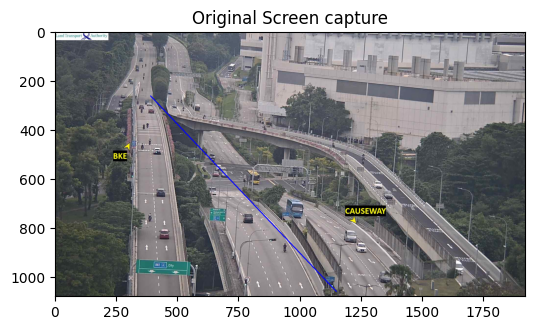

In [5]:
fig = plt.figure(figsize=(10, 5)) 
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1]) 

ax1 = fig.add_subplot(gs[0])
ax1.imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Screen capture')

In [6]:
# [Testing] to test (1) read from CSV file with random coordinates
df = pd.read_csv('../data/GP_2702_Test1.csv')

# Convert x and y columns to a list of tuples
test_points = list(zip(df['x'], df['y']))
test_points

[(1258, -895), (1202, -837), (785, -765), (989, -720)]

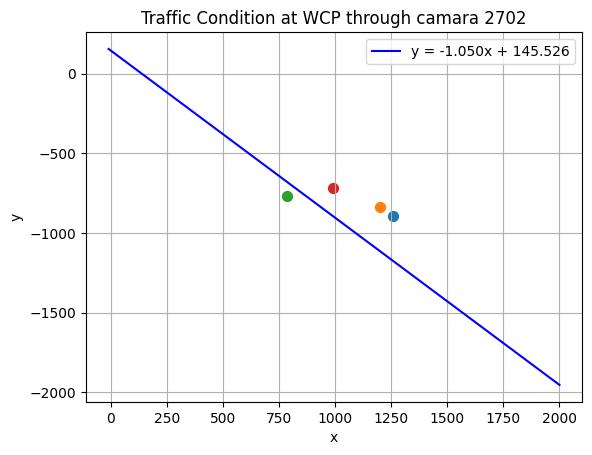

In [7]:
# from row 3, with 2 points define a central line
X1 = 1149
Y1 = -1061
X2 = 390
Y2 = -264

m = (Y1 - Y2) / (X1 - X2)
b = Y1 - m * X1

x_values = np.linspace(-10, 2000, 100)
y_values = m * x_values + b
plt.plot(x_values, y_values, label=f'y = {m:.3f}x + {b:.3f}', color='blue')

# represent car with dot and plot in the plot for better visualisation
for x_test, y_test in test_points:
    plt.scatter(x_test, y_test, s=50)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Traffic Condition at WCP through camara 2702')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Print each point's position
for x_test, y_test in test_points:
    y_on_line = m * x_test + b
    position = "JB" if y_test > y_on_line else "SG" if y_test < y_on_line else "on the line"
    print(f"The vehicle at ({x_test}, {y_test}) is going to {position}.")

The vehicle at (1258, -895) is going to JB.
The vehicle at (1202, -837) is going to JB.
The vehicle at (785, -765) is going to SG.
The vehicle at (989, -720) is going to JB.


In [9]:
# To count number of car to JB or SG
count_JB = 0
count_SG = 0

# Determine the direction for each car
for _, row in df.iterrows():
    x, y = row['x'], row['y']  # Assuming CSV has 'x' and 'y' columns for coordinates
    y_on_line = m * x + b  # Calculate the y-value on the line at x

    if y > y_on_line:
        count_JB += 1
    elif y < y_on_line:
        count_SG += 1

# Print the results
print(f"Number of cars going to JB: {count_JB}")
print(f"Number of cars going to SG: {count_SG}")

Number of cars going to JB: 3
Number of cars going to SG: 1


In [44]:
# [Testing] to test (1) read from CSV file, (2) with different timing
df = pd.read_csv('../data/GP_2701_Test2.csv')
df_0008 = df[df['Time'] == "00-08"]
df_0028 = df[df['Time'] == "00-28"]

date_0008 = df_0008['Date'].iloc[1]
time_0008 = df_0008['Time'].iloc[2]
date_0028 = df_0028['Date'].iloc[1]
time_0028 = df_0028['Time'].iloc[2]

print(date_0028)
print(time_0028)

14-Oct-24
00-28


In [45]:
# Convert x and y columns to a list of tuples
test_points_0008 = list(zip(df_0008['center_x'], df['center_y_1']))
test_points_0028 = list(zip(df_0028['center_x'], df['center_y_1']))
len(test_points_0028)

23

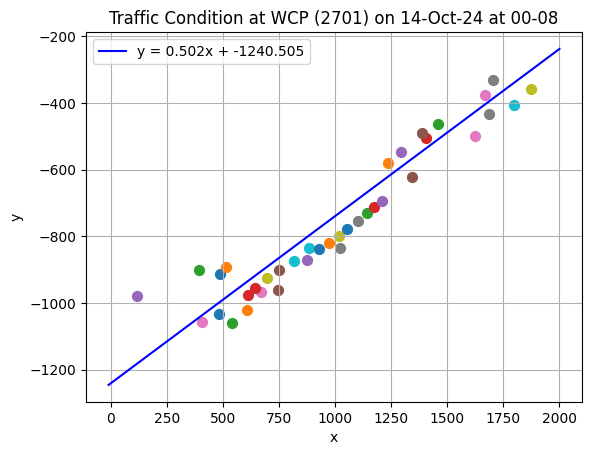

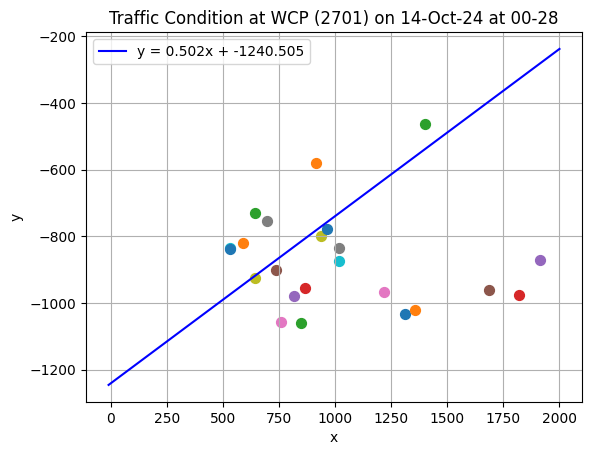

In [46]:
# from row 3, with 2 points define a central line
X1 = 322
Y1 = -1079
X2 = 1917
Y2 = -279

m = (Y1 - Y2) / (X1 - X2)
b = Y1 - m * X1

x_values = np.linspace(-10, 2000, 100)
y_values = m * x_values + b

# Define a function to plot traffic condition for a given set of test points and time
def plot_traffic_condition(test_points, date, time):
    # Plot the line
    plt.plot(x_values, y_values, label=f'y = {m:.3f}x + {b:.3f}', color='blue')

    # Loop through each test point to determine its position and plot it
    for x_test, y_test in test_points:
        plt.scatter(x_test, y_test, s=50)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Traffic Condition at WCP (2701) on {date} at {time}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for each subset of test points
plot_traffic_condition(test_points_0008, date_0008, time_0008)
plot_traffic_condition(test_points_0028, date_0028, time_0028)

In [47]:
# to show number of car via text
# prepare counters for each time frame
time_frames = ["00-08", "00-28"] 
counts = {time: {'JB': 0, 'SG': 0} for time in time_frames}

# Loop through each time frame and count cars going to JB and SG
for time_frame in time_frames:
    # Filter data for the specific time frame
    df_time = df[df['Time'] == time_frame]
    
    # Determine the direction for each car in the filtered data
    for _, row in df_time.iterrows():
        x, y = row['center_x'], row['center_y_1']
        y_on_line = m * x + b  # Calculate the y-value on the line at x

        if y > y_on_line:
            counts[time_frame]['JB'] += 1
        elif y < y_on_line:
            counts[time_frame]['SG'] += 1

# Print the results for each time frame
for time_frame, count in counts.items():
    print(f" Time {time_frame}:")
    print(f"   Number of cars going to JB: {count['JB']}")
    print(f"   Number of cars going to SG: {count['SG']}")


 Time 00-08:
   Number of cars going to JB: 11
   Number of cars going to SG: 27
 Time 00-28:
   Number of cars going to JB: 5
   Number of cars going to SG: 18


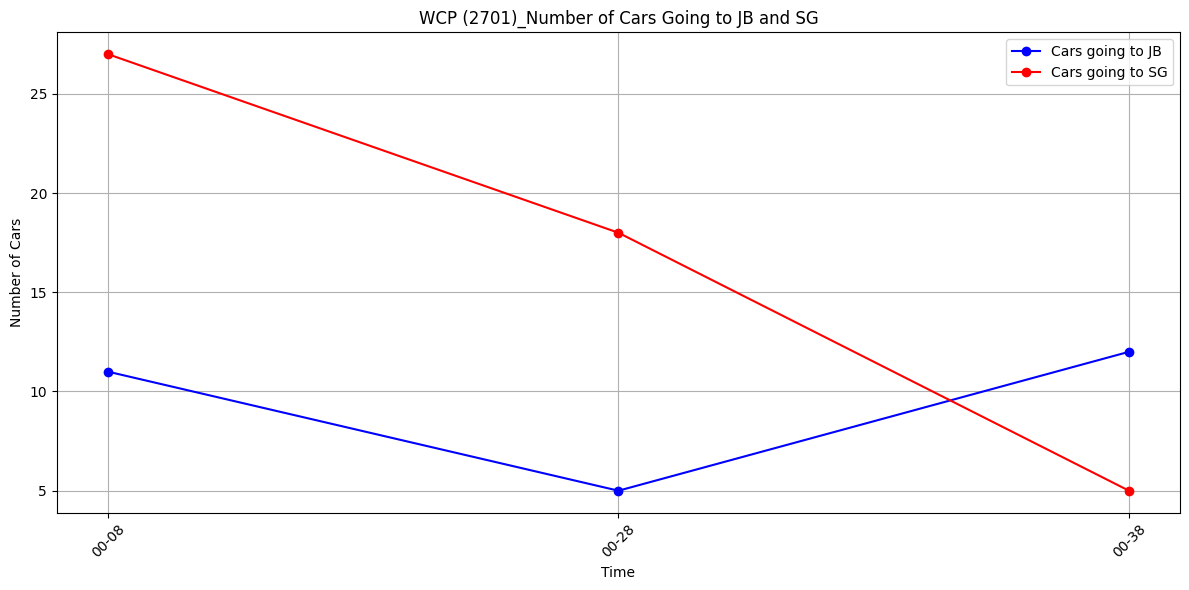

In [39]:
# to show number of car via plot
# Prepare counters for each time frame
time_frames = df['Time'].unique()
counts = {time: {'JB': 0, 'SG': 0} for time in time_frames}

# Count the number of cars going to JB and SG for each time frame
for time_frame in time_frames:
    df_time = df[df['Time'] == time_frame]
    for _, row in df_time.iterrows():
        x, y = row['center_x'], row['center_y_1']
        y_on_line = m * x + b

        if y > y_on_line:
            counts[time_frame]['JB'] += 1
        elif y < y_on_line:
            counts[time_frame]['SG'] += 1

# Extract data for plotting
times = sorted(counts.keys())
cars_to_JB = [counts[time]['JB'] for time in times]
cars_to_SG = [counts[time]['SG'] for time in times]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(times, cars_to_JB, label='Cars going to JB', color='blue', marker='o')
plt.plot(times, cars_to_SG, label='Cars going to SG', color='red', marker='o')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Cars')
plt.title('WCP (2701)_Number of Cars Going to JB and SG')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

plt.show()